In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load image data and labels
def load_data(data_dir):
    images = []
    labels = []
    for label in ['no', 'yes']:
        label_path = os.path.join(data_dir, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
            image = cv2.resize(image, (100, 100))  # Resize image to a suitable size
            images.append(image)
            labels.append(0 if label == 'no' else 1)  # Assign 0 to 'no_tumor' and 1 to 'tumor'
    return np.array(images), np.array(labels)

In [3]:
# Replace 'data_dir' with the correct path to your dataset directory containing 'no_tumor' and 'tumor' folders.
data_dir = r'D:\Downloads\archive (4)\brain_tumor_dataset'

# Load data and labels
X, y = load_data(data_dir)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images (if using non-CNN models)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Training the classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [4]:
# Evaluate the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.85      0.90      0.88        31

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.83        51
weighted avg       0.84      0.84      0.84        51

Confusion Matrix:
[[15  5]
 [ 3 28]]


Enter the file path of the test image: D:\Downloads\archive (4)\brain_tumor_dataset\yes\Y77.jpg


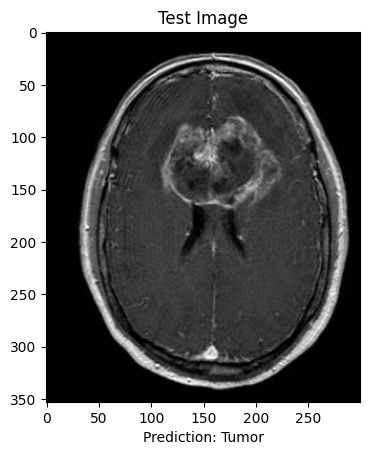

The test image contains a brain tumor.


In [5]:
# Testing input
test_image_path = input("Enter the file path of the test image: ")
if os.path.isfile(test_image_path):
    test_image = cv2.imread(test_image_path)
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    test_image_resized = cv2.resize(test_image_gray, (100, 100)).reshape(1, -1)
    prediction = classifier.predict(test_image_resized)
    
    # Display the test image with the prediction label
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.title("Test Image")
    plt.xlabel("Prediction: Tumor" if prediction[0] == 1 else "Prediction: No Tumor")
    plt.show()
    
    if prediction[0] == 0:
        print("The test image does not contain a brain tumor.")
    else:
        print("The test image contains a brain tumor.")
else:
    print("Invalid file path. Please provide a valid file path.")